# Candidate Number: A12988

## Part 2 (a)
*In this task, we are required to find "What are the best times and days of the week to minimise delays each year?"*

***Data Preparation:****
    
- ***"Loaded flight data for each year from 1998 to 2007 and supplementary plane data"***
- ***"Defined a function to convert time from HHMM format to minutes"***
- ***"Created time range bins of 60-minute intervals spanning a 24-hour period"***

***Data Processing:***
    
- ***"Iterated over each year"***
- ***"Read flight data, merged with plane data, and processed time columns"***
- ***"Segmented departure times into time ranges and assigned labels based on the bins"***
- ***"Handled moments where departure or arrival times exceeded 24 hours"***
- ***"Dealt with missing values in the dataset"***

***Data Analysis:***
    
- ***"Calculated the proportion of delayed flights for each time range"***
- ***"Plotted bar charts for each year, showing the proportion of delayed flights"***
- ***"Set appropriate labels and titles for the plots"***
- ***"Displayed each plot to visualize flight delay trends over the years"***

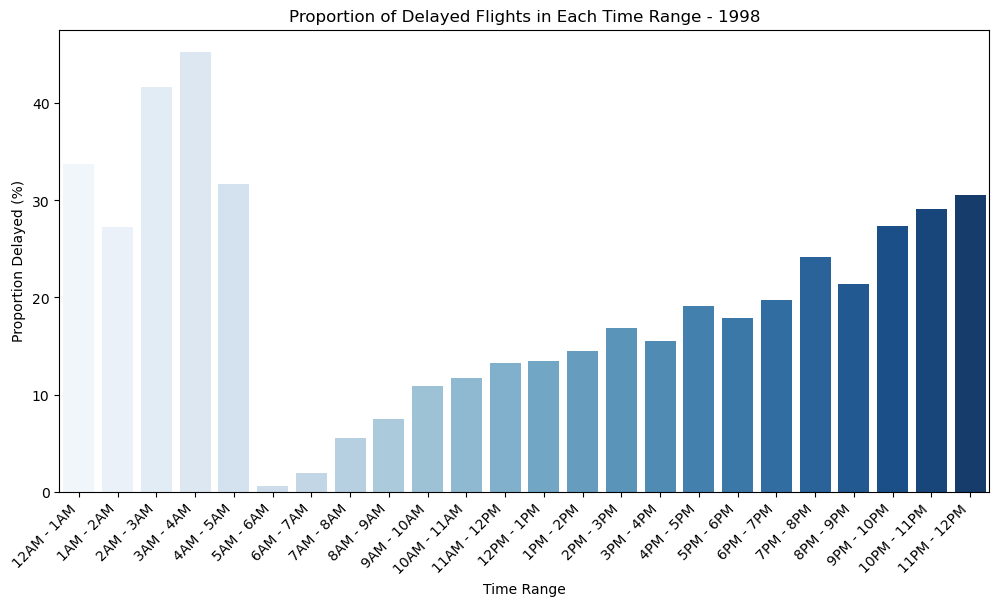

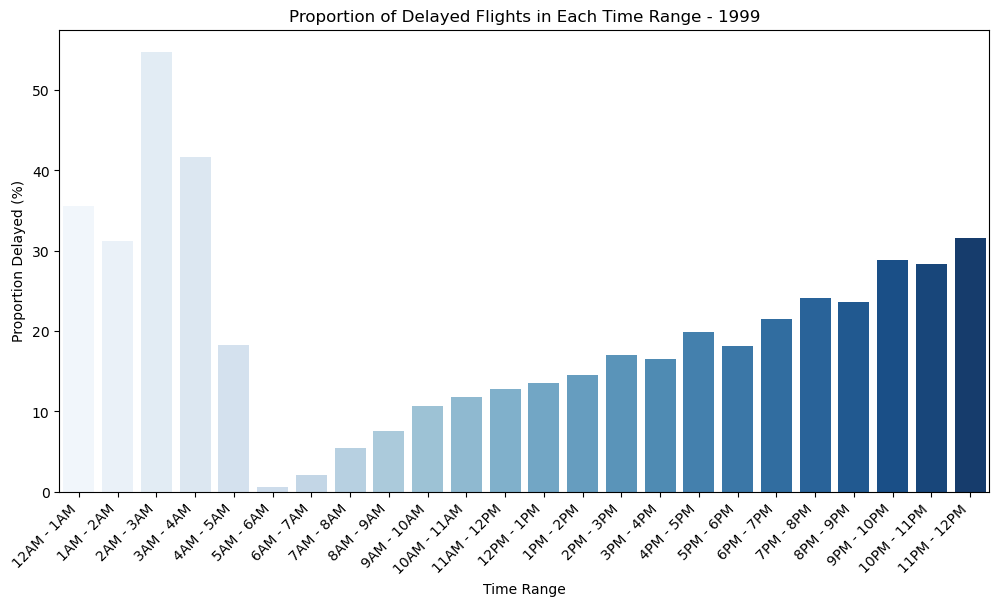

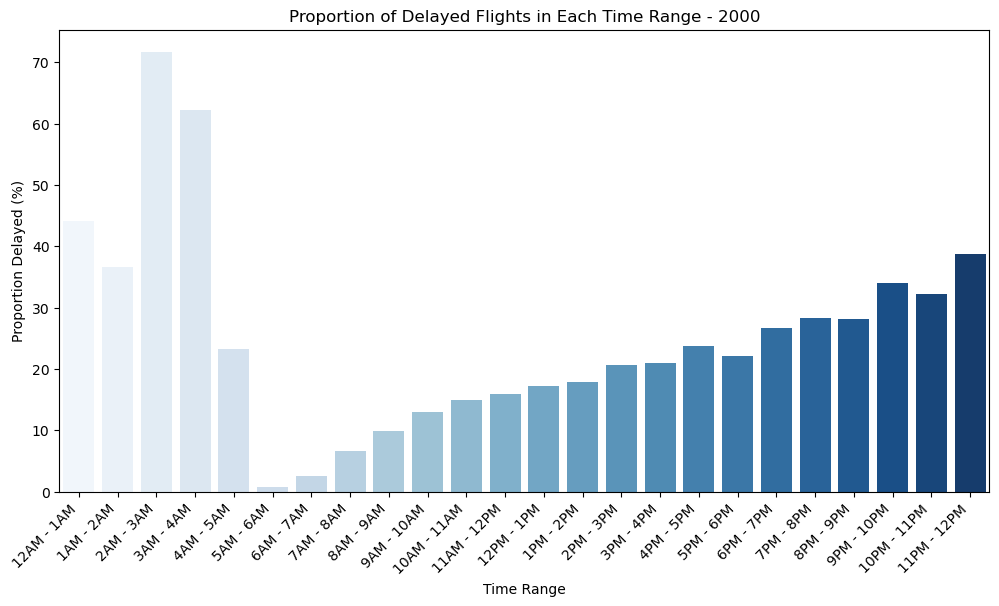

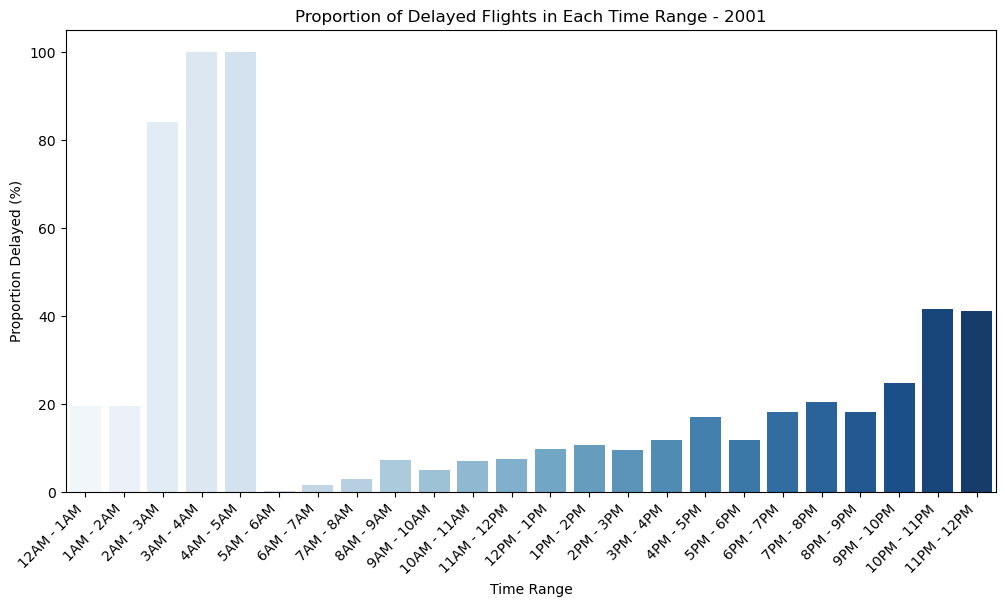

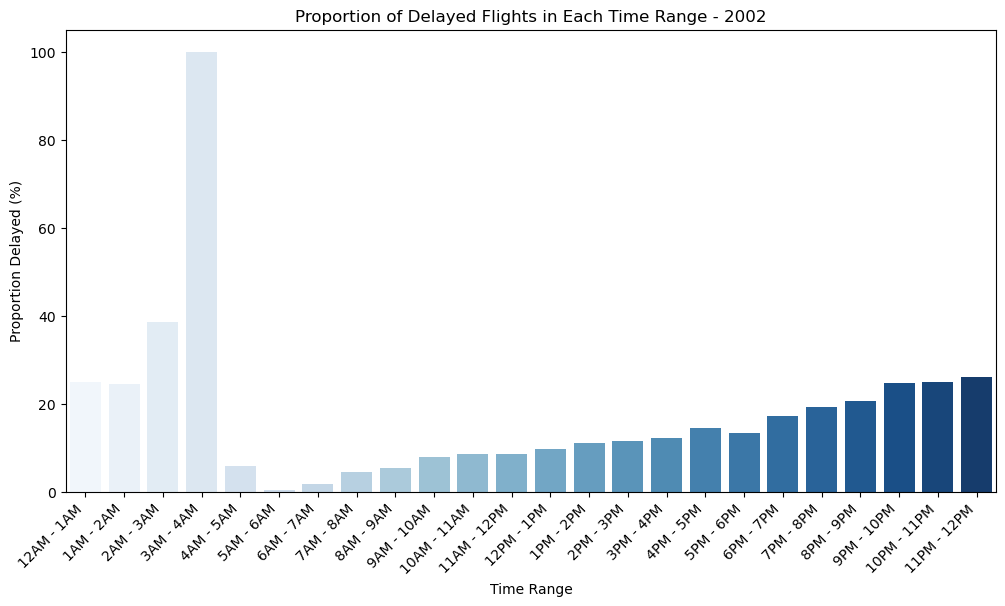

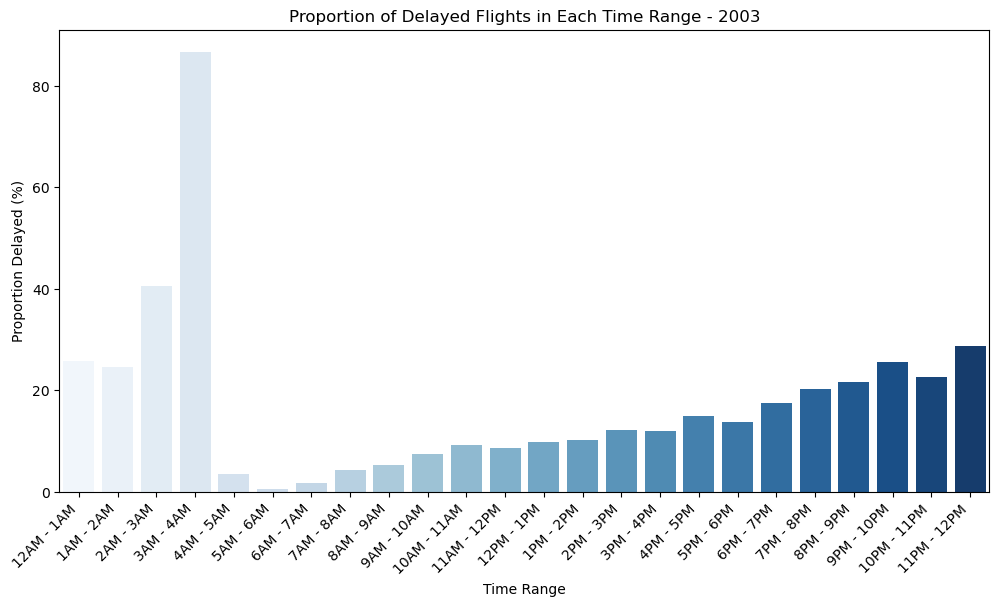

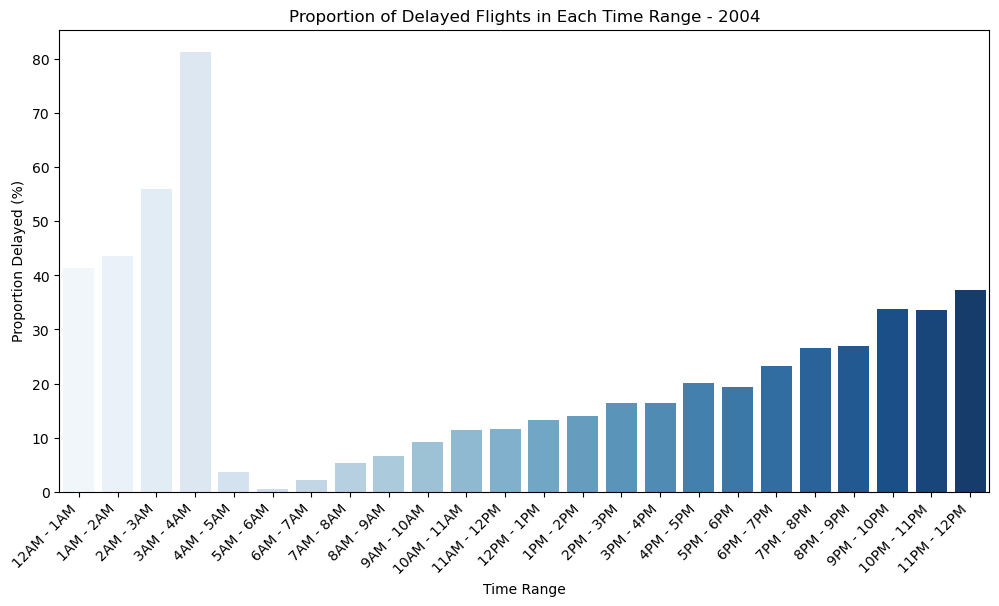

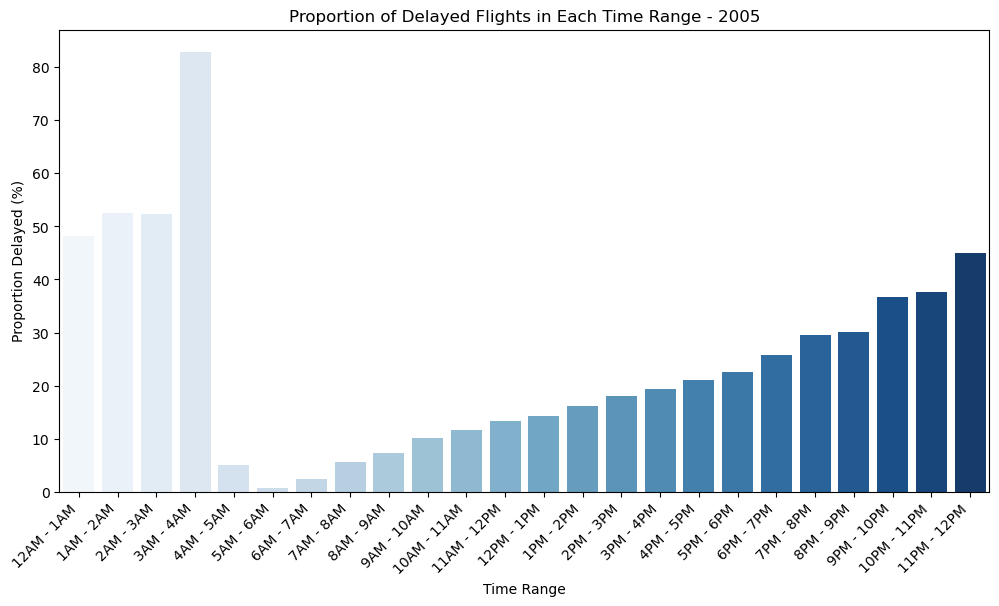

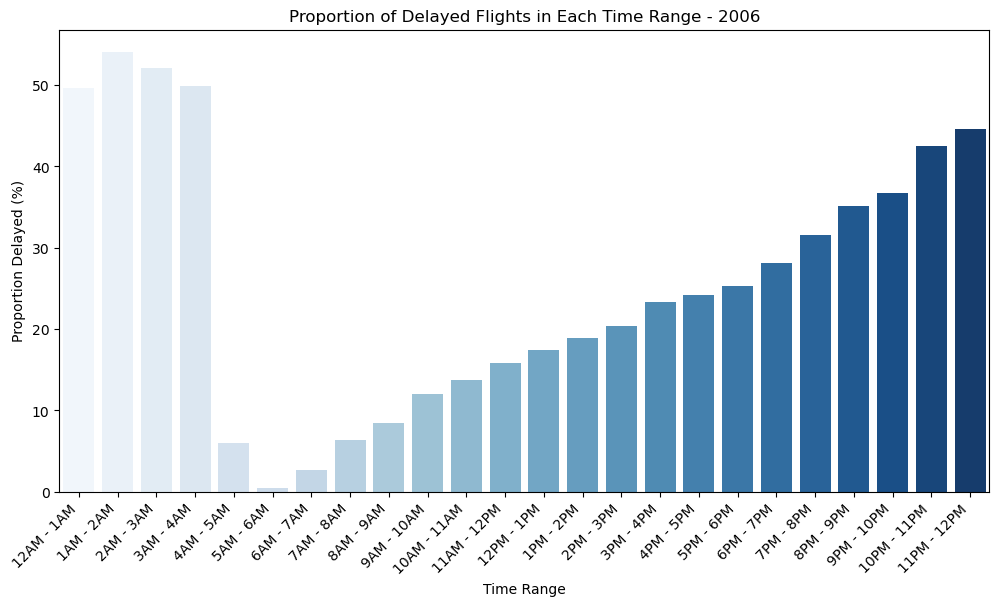

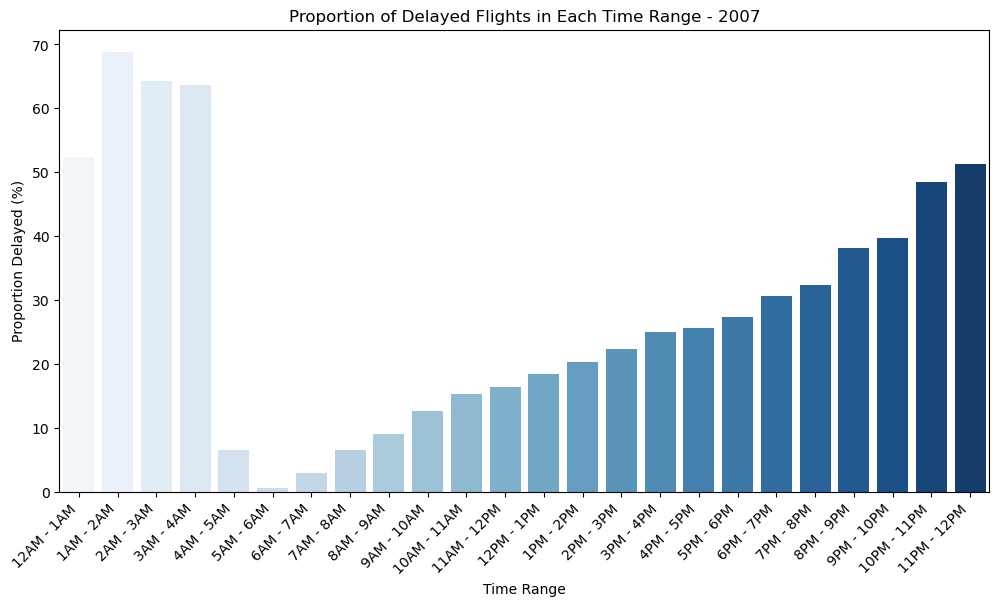

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to convert time to minutes
def convert_to_minutes(hhmm_time):
    if pd.isnull(hhmm_time):  # Handle missing values
        return np.nan
    hours = hhmm_time // 100
    minutes = hhmm_time % 100
    if hours >= 24:  # Handle outliers exceeding 24 hours
        hours -= 24
    return hours * 60 + minutes

# List of years from 1998 to 2007
years = range(1998, 2008)

# Load supplementary files
planes = pd.read_csv('/Users/macbookpro/Downloads/dataverse_files/plane-data.csv')

# Create time range bins
time_bins = np.arange(0, 1441, 60)

# Iterate over each year
for year in years:
    # Read data for the current year with specified encoding and low_memory=False
    flights = pd.read_csv(f"/Users/macbookpro/Downloads/dataverse_files/{year}.csv.bz2", encoding='latin1', low_memory=False)

    # Merge data with planes
    merged_data = pd.merge(flights, planes, how='inner', left_on='TailNum', right_on='tailnum')
    merged_data = merged_data.rename(columns={'year': 'plane_expl_year'}).drop(columns='tailnum')

    # Convert time columns to minutes and handle missing values & outliers
    time_columns = ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']
    for col in time_columns:
        merged_data[col] = merged_data[col].apply(convert_to_minutes)

    # Calculate time range labels
    time_labels = []
    for time_bin in time_bins[:-1]:
        start_hour = time_bin // 60
        end_hour = (time_bin + 60) // 60
        if start_hour == 0:
            start_hour_str = "12AM"
        elif start_hour < 12:
            start_hour_str = f"{start_hour}AM"
        elif start_hour == 12:
            start_hour_str = "12PM"
        else:
            start_hour_str = f"{start_hour - 12}PM"

        if end_hour == 0:
            end_hour_str = "12AM"
        elif end_hour < 12:
            end_hour_str = f"{end_hour}AM"
        elif end_hour == 12:
            end_hour_str = "12PM"
        else:
            end_hour_str = f"{end_hour - 12}PM"

        time_labels.append(f"{start_hour_str} - {end_hour_str}")

    merged_data['DepTimeGroup'] = pd.cut(merged_data['DepTime'], bins=time_bins, right=False, labels=time_labels)

    # Calculate proportion of delayed flights for each time range
    proportion_delayed = merged_data.groupby('DepTimeGroup')['DepDelay'].apply(lambda x: (x > 15).mean()) * 100
    proportion_delayed = proportion_delayed.reset_index(name='ProportionDelayed')

    # Plot bar chart
    plt.figure(figsize=(12, 6))
    bar_plot = sns.barplot(x='DepTimeGroup', y='ProportionDelayed', data=proportion_delayed, palette='Blues')

    # Set labels and title
    plt.xlabel('Time Range')
    plt.ylabel('Proportion Delayed (%)')
    plt.title(f'Proportion of Delayed Flights in Each Time Range - {year}')
    plt.xticks(rotation=45, ha='right')

    # Show the plot
    plt.show()

***Conclusion: We can see that the best times to minimize delay is between 5AM-6AM for each year, as the proportion of passengers delayed is the smallest and do not exceed 5%*** 

1. ***Data Preparation:***
    
   - ***"Loaded flight data for each year from 1998 to 2007"***
   - ***"Loaded supplementary plane data"***
   
2. **Data Processing:**
    
   - ***"Calculated the proportion of delayed flights for each day of the week"***
   - ***"Renamed the day of the week from integer to string representation"***
   - ***"Added the year as a column to the DataFrame"***
   
3. **Data Analysis:**
    
   - ***"Plotted bar charts for the proportion of delayed flights by day of the week for each year"***
   - ***"Set appropriate labels and titles for each plot"***
   - ***"Displayed each plot to visualize the proportion of delayed flights trends over the years"***


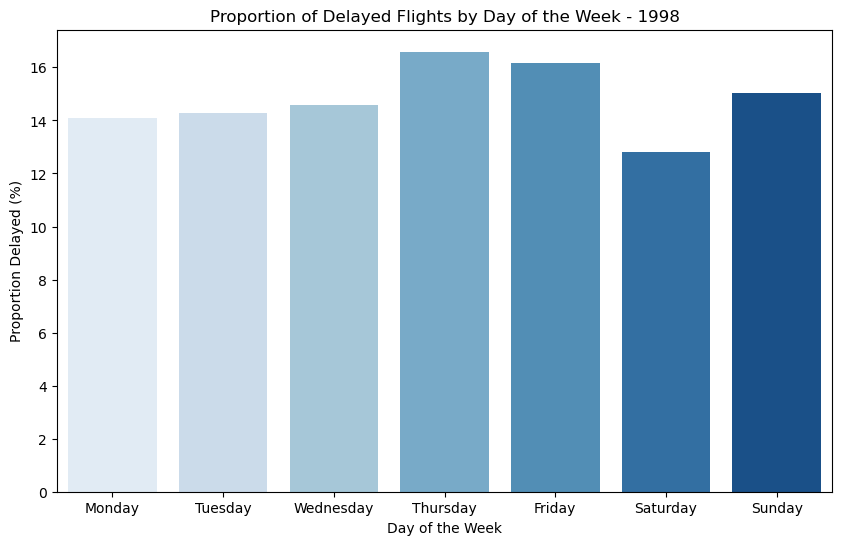

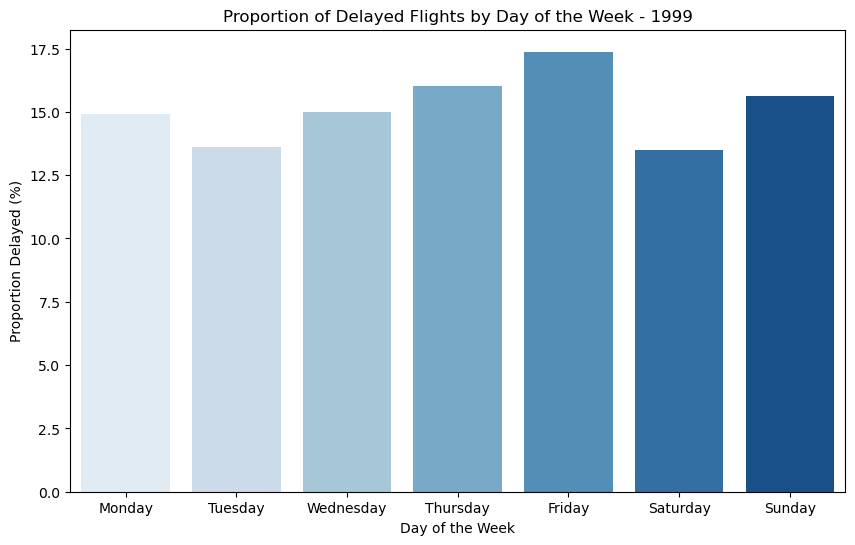

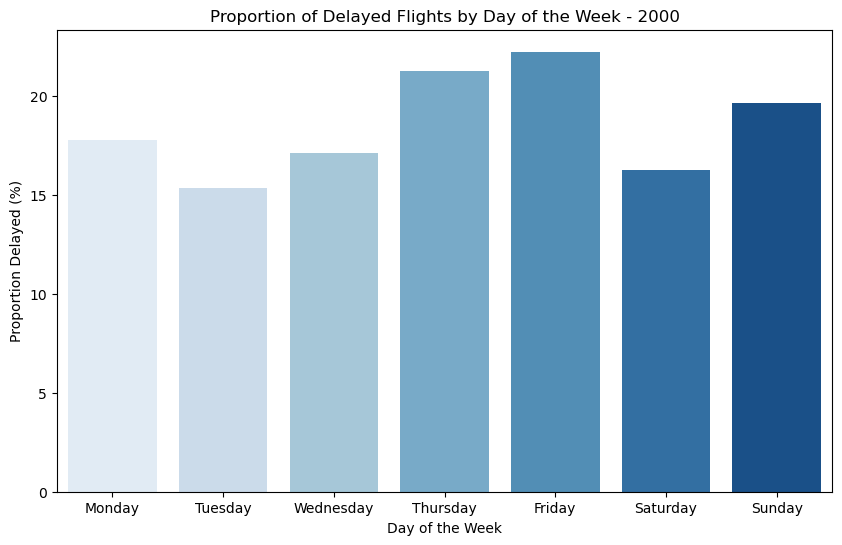

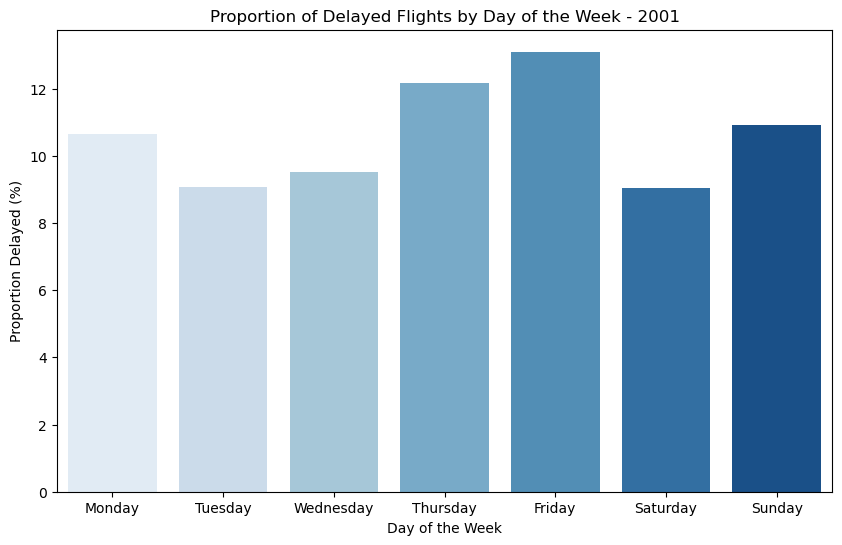

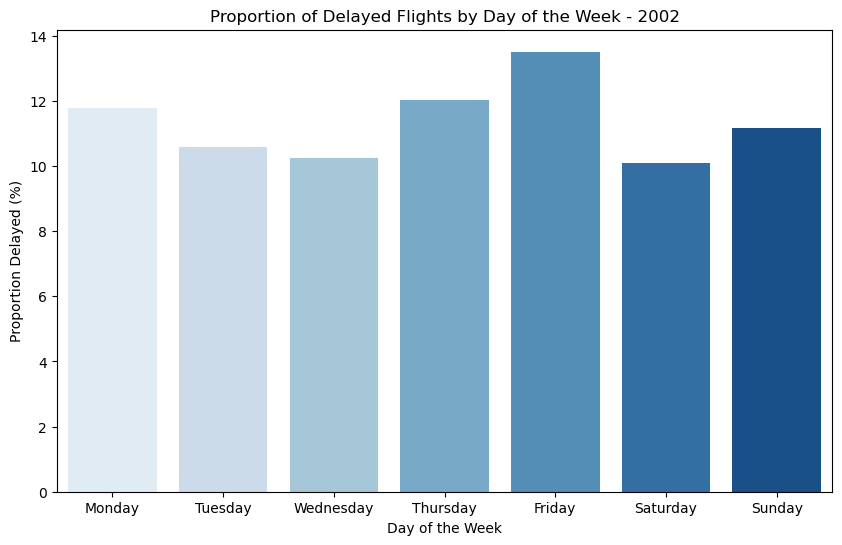

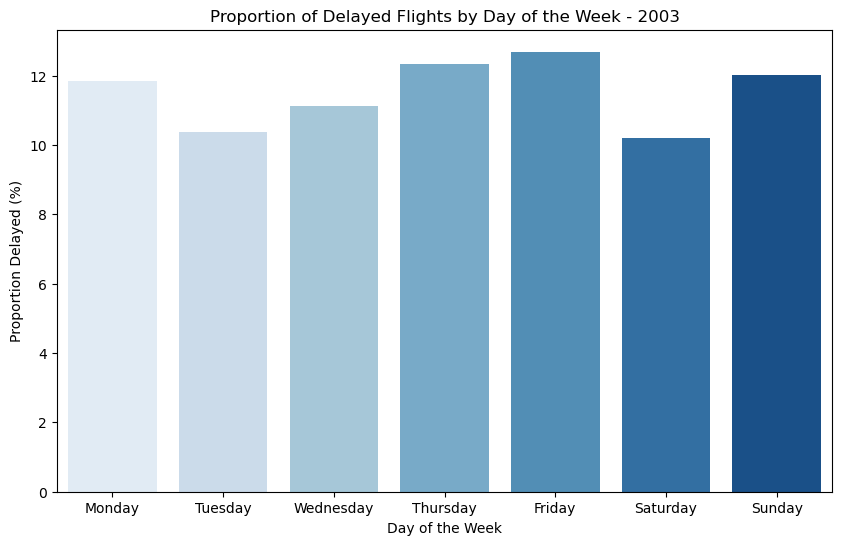

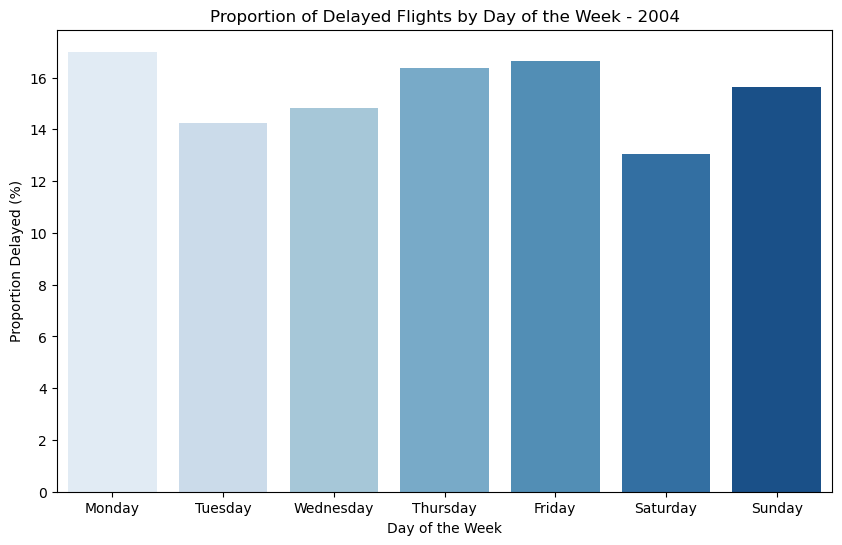

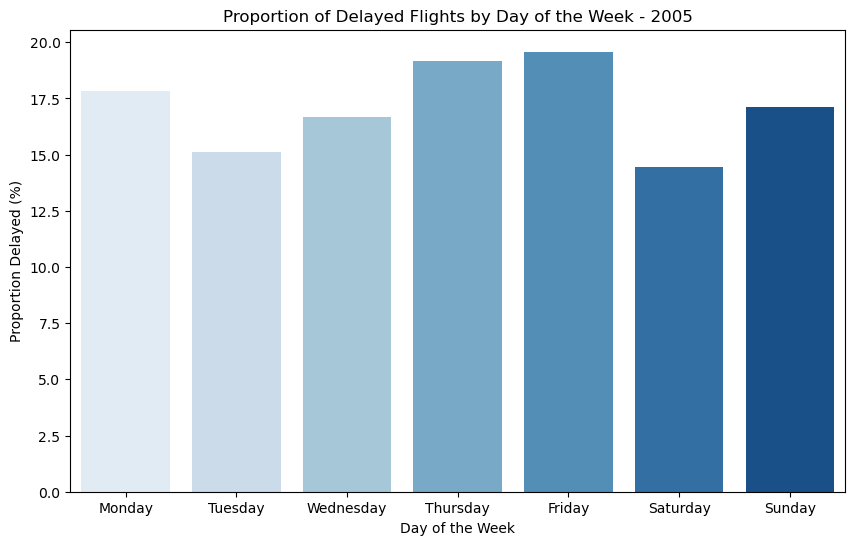

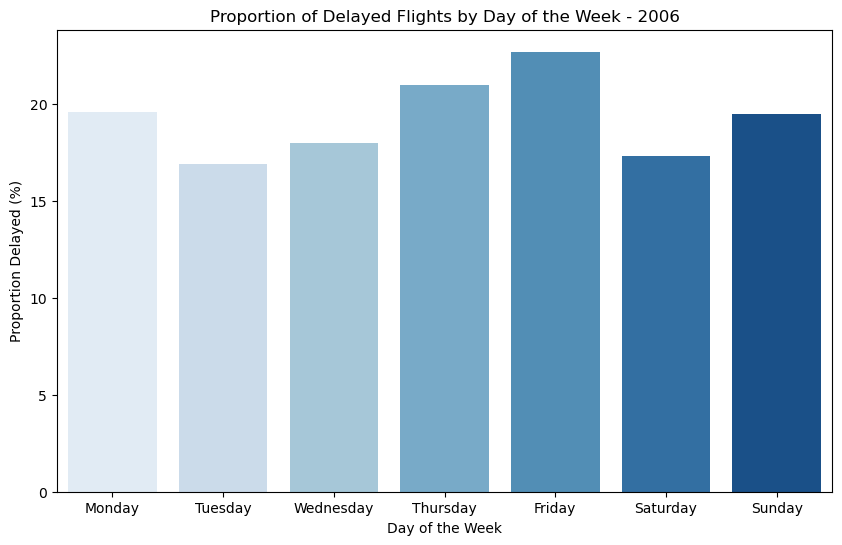

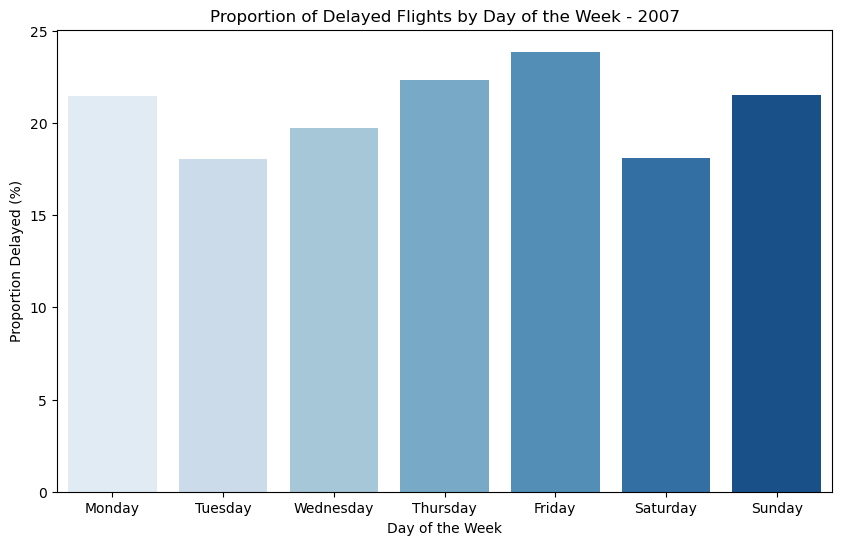

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of years from 1998 to 2007
years = range(1998, 2008)

# Load supplementary files
planes = pd.read_csv('/Users/macbookpro/Downloads/dataverse_files/plane-data.csv')

# Create an empty list to store DataFrames for each year
proportion_delayed_weekday_list = []

# Iterate over each year
for year in years:
    # Read data for the current year with specified encoding and low_memory=False
    flights = pd.read_csv(f"/Users/macbookpro/Downloads/dataverse_files/{year}.csv.bz2", encoding='latin1', low_memory=False)

    # Merge data with planes
    merged_data = pd.merge(flights, planes, how='inner', left_on='TailNum', right_on='tailnum')
    merged_data = merged_data.rename(columns={'year': 'plane_expl_year'}).drop(columns='tailnum')

    # Calculate proportion of delayed flights for each day of the week
    proportion_delayed_day = merged_data.groupby('DayOfWeek')['DepDelay'].apply(lambda x: (x > 15).mean()) * 100
    proportion_delayed_day = proportion_delayed_day.reset_index(name='ProportionDelayed')

    # Rename day of week from integer to string
    day_names = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
    proportion_delayed_day['DayOfWeek'] = proportion_delayed_day['DayOfWeek'].map(day_names)

    # Add the year as a column
    proportion_delayed_day['Year'] = year

    # Append the results to the list
    proportion_delayed_weekday_list.append(proportion_delayed_day)

    # Plot bar chart for proportion of delayed flights by day of the week for the current year
    plt.figure(figsize=(10, 6))
    sns.barplot(x='DayOfWeek', y='ProportionDelayed', data=proportion_delayed_day, palette='Blues')

    # Set labels and title
    plt.xlabel('Day of the Week')
    plt.ylabel('Proportion Delayed (%)')
    plt.title(f'Proportion of Delayed Flights by Day of the Week - {year}')

    # Show the plot
    plt.show()

***Conclusion: We can see that the best day of week to minimize delays each year on average is Saturday, in this days we have the least Proportion Delayed than in other days of week. Generally it doesn't exceed 15% on average.***